A **neural network model** for **classification** is a computational framework designed to classify data into predefined classes. It consists of **interconnected layers** of **neurons**, where each *neuron applies a mathematical operation to its input and passes the result to the next layer*. The model typically includes an input layer that receives the raw data, **one or more hidden layers** that learn intricate patterns through **weighted connections** and **activation functions**, and an *output layer that produces the final class predictions*. The ability of neural networks to capture **non-linear patterns** in data through the use of non-linear activation functions is a key factor in their effectiveness. During training, the model **adjusts its weights** using a process called **backpropagation**, which *minimizes the discrepancy between the predicted and actual class labels*. Neural network classifiers are widely used due to their ability to handle complex and high-dimensional datasets, making them effective for tasks like image recognition, text classification, and medical diagnosis.

### Read the Data

In [1]:
import pandas as pd

# Read the training datasets
X_train_original = pd.read_csv('neural/X_train_original.csv')
X_train_original = X_train_original.set_index('Unnamed: 0')

X_train_transformed = pd.read_csv('neural/X_train_transformed.csv')
X_train_transformed = X_train_transformed.set_index('Unnamed: 0')

X_train_discretized = pd.read_csv('neural/X_train_discretized.csv')
X_train_discretized = X_train_discretized.set_index('Unnamed: 0')

# Read the test datasets
X_test_original = pd.read_csv('neural/X_test_original.csv')
X_test_original = X_test_original.set_index('Unnamed: 0')

X_test_transformed = pd.read_csv('neural/X_test_transformed.csv')
X_test_transformed = X_test_transformed.set_index('Unnamed: 0')

X_test_discretized = pd.read_csv('neural/X_test_discretized.csv')
X_test_discretized = X_test_discretized.set_index('Unnamed: 0')

# Read the target variable for training and testing
y_train = pd.read_csv('neural/y_train.csv')
y_train = y_train.set_index('Unnamed: 0').squeeze()

y_test = pd.read_csv('neural/y_test.csv')
y_test = y_test.set_index('Unnamed: 0').squeeze() 


### Train and Validate the Neural Network Model

consider these model parameters:  

#### hidden_layer_sizes
- **Type**: array-like of shape (n_layers - 2,)
- **Default**: (100,)
- **Description**: The ith element represents the number of neurons in the ith hidden layer.

#### activation
- **Type**: {'identity', 'logistic', 'tanh', 'relu'}
- **Default**: 'relu'
- **Description**: Activation function for the hidden layer.
    - **'identity'**: No-op activation, useful to implement linear bottleneck, returns f(x) = x.
    - **'logistic'**: The logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
    - **'tanh'**: The hyperbolic tan function, returns f(x) = tanh(x).
    - **'relu'**: The rectified linear unit function, returns f(x) = max(0, x).

#### solver
- **Type**: {'lbfgs', 'sgd', 'adam'}
- **Default**: 'adam'
- **Description**: The solver for weight optimization.
    - **'lbfgs'**: An optimizer in the family of quasi-Newton methods.
    - **'sgd'**: Refers to stochastic gradient descent.
    - **'adam'**: Refers to a stochastic gradient-based optimizer proposed by Kingma, Diederik, and Jimmy Ba.
    - **Note**: The default solver 'adam' works well on relatively large datasets (with thousands of training samples or more) in terms of both training time and validation score. For small datasets, 'lbfgs' can converge faster and perform better.

#### alpha
- **Type**: float
- **Default**: 0.0001
- **Description**: Strength of the L2 regularization term. The L2 regularization term is divided by the sample size when added to the loss.
    - **Example**: For an example usage and visualization of varying regularization, see [Varying regularization in Multi-layer Perceptron](https://scikit-learn.org/stable/auto_examples/neural_networks/plot_mlp_alpha.html).

#### batch_size
- **Type**: int
- **Default**: 'auto'
- **Description**: Size of minibatches for stochastic optimizers. If the solver is 'lbfgs', the classifier will not use minibatch. When set to "auto", batch_size=min(200, n_samples).

#### learning_rate
- **Type**: {'constant', 'invscaling', 'adaptive'}
- **Default**: 'constant'
- **Description**: Learning rate schedule for weight updates.
    - **'constant'**: A constant learning rate given by 'learning_rate_init'.
    - **'invscaling'**: Gradually decreases the learning rate at each time step 't' using an inverse scaling exponent of 'power_t'. Effective learning rate = learning_rate_init / pow(t, power_t).
    - **'adaptive'**: Keeps the learning rate constant to 'learning_rate_init' as long as training loss keeps decreasing. Each time two consecutive epochs fail to decrease training loss by at least tol, or fail to increase validation score by at least tol if 'early_stopping' is on, the current learning rate is divided by 5.
    - **Note**: Only used when solver='sgd'.

#### learning_rate_init
- **Type**: float
- **Default**: 0.001
- **Description**: The initial learning rate used. It controls the step-size in updating the weights. Only used when solver='sgd' or 'adam'.

#### max_iter
- **Type**: int
- **Default**: 200
- **Description**: Maximum number of iterations. The solver iterates until convergence (determined by 'tol') or this number of iterations. For stochastic solvers ('sgd', 'adam'), this determines the number of epochs (how many times each data point will be used), not the number of gradient steps.

#### random_state
- **Type**: int, RandomState instance
- **Default**: None
- **Description**: Determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver='sgd' or 'adam'. Pass an int for reproducible results across multiple function calls. See [Glossary](https://scikit-learn.org/stable/glossary.html#term-random-state).
  
#### n_iter_no_change
- **Type**: int
- **Default**: 10
- **Description**: Maximum number of epochs to not meet tol improvement. Only effective when solver='sgd' or 'adam'.  

*This markdown presents the model parameters for the KNN algorithm in a format similar to that of the sklearn documentation.*

In [2]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report

model = MLPClassifier(hidden_layer_sizes=(10), activation='relu', solver='adam', alpha=0, batch_size=20,
                learning_rate='constant', learning_rate_init=0.001, max_iter=1000, random_state=111, n_iter_no_change=10)

model.fit(X_train_original, y_train)

y_pred_train = model.predict(X_train_original)
y_pred_test = model.predict(X_test_original)

cm_train = confusion_matrix(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)

cm_test = confusion_matrix(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("Evaluation the Model on Training Set")
print(f"Confusion Matrix:\n{cm_train}")
print(f"Classification Report:\n{report_train}")
print("-"*80)
print("Evaluation the Model on Testing Set")
print(f"Confusion Matrix:\n{cm_test}")
print(f"Classification Report:\n{report_test}")

Evaluation the Model on Training Set
Confusion Matrix:
[[341  23]
 [ 45  76]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       364
           1       0.77      0.63      0.69       121

    accuracy                           0.86       485
   macro avg       0.83      0.78      0.80       485
weighted avg       0.85      0.86      0.85       485

--------------------------------------------------------------------------------
Evaluation the Model on Testing Set
Confusion Matrix:
[[142  11]
 [ 29  28]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.93      0.88       153
           1       0.72      0.49      0.58        57

    accuracy                           0.81       210
   macro avg       0.77      0.71      0.73       210
weighted avg       0.80      0.81      0.80       210



### Identify the Optimal Model through Hyperparameter Tuning

Since the ANN model does not inherently address class imbalance, I utilized a **sampling method** to tackle this challenge. You can find the approach used in this notebook: https://www.kaggle.com/code/zahrazolghadr/overcoming-imbalanced-data-challenges

In [3]:
from imblearn.over_sampling import SMOTE
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

def ANN_modeling(X_train, y_train, X_test, y_test):
    
    # Perform SMOTE oversampling
    smote = SMOTE(random_state=1)
    X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

    # Define a custom scorer for class '1' F1-score
    def custom_f1_scorer(y_true, y_pred):
        return f1_score(y_true, y_pred, pos_label=1)

    custom_scorer = make_scorer(custom_f1_scorer)

    # Initialize the KNeighborsClassifier
    ann = MLPClassifier(solver='adam', alpha=0, batch_size=20, learning_rate='constant', max_iter=10000, random_state=111)

    # Set up the parameter grid
    param_grid = {
        'hidden_layer_sizes': [(3,), (5,), (10,), (20,), (10, 5), (20, 10)],  
        'activation': ['relu', 'tanh', 'logistic'],
        'learning_rate_init': [0.001, 0.01, 0.1],
        'n_iter_no_change': [10, 20, 30]
    }

    # Perform Grid Search with custom F1 scorer
    grid_search = GridSearchCV(ann, param_grid, scoring=custom_scorer, cv=5, n_jobs=-1)

    # Fit the model
    grid_search.fit(X_train_smote, y_train_smote)

    # Print the best parameters and the best score
    print("Best parameters found: ", grid_search.best_params_)
    print("Best custom F1 score: ", grid_search.best_score_)

    # Evaluate the best model on the test set
    best_ann = grid_search.best_estimator_
    y_pred = best_ann.predict(X_test)
    custom_f1 = custom_f1_scorer(y_test, y_pred)

    print(f"Custom F1 Score on test set: {custom_f1}")
    
    return


In [4]:
ANN_modeling(X_train_original, y_train, X_test_original, y_test)

Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.01, 'n_iter_no_change': 30}
Best custom F1 score:  0.8694694944656222
Custom F1 Score on test set: 0.5925925925925926


In [5]:
ANN_modeling(X_train_transformed, y_train, X_test_transformed, y_test)

Best parameters found:  {'activation': 'tanh', 'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.01, 'n_iter_no_change': 20}
Best custom F1 score:  0.8746375248805428
Custom F1 Score on test set: 0.5


In [6]:
ANN_modeling(X_train_discretized, y_train, X_test_discretized, y_test)

Best parameters found:  {'activation': 'relu', 'hidden_layer_sizes': (20, 10), 'learning_rate_init': 0.001, 'n_iter_no_change': 30}
Best custom F1 score:  0.8680503835286002
Custom F1 Score on test set: 0.4864864864864865


# Neural Networks with Keras

## 1. Deep Neural Networks

Traditional neural networks, such as **shallow Multi-Layer Perceptrons** (MLPs), consist of an input layer, one or two hidden layers, and an output layer. Deep neural networks (DNNs), in contrast, have multiple hidden layers. This depth allows them to model more complex patterns in data, making them suitable for a wide range of tasks, including image and speech recognition, natural language processing, and more. Key advantages include:

- **Automatic Feature Learning**: Deep networks can automatically learn features from raw data, reducing the need for manual feature engineering.
- **Improved Performance**: Capable of achieving higher accuracy and better generalization on complex tasks.
- **Scalability**: Better suited for large-scale datasets and high-dimensional data.  

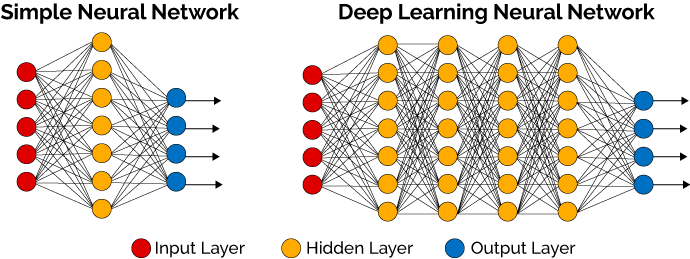

## 2. Deep Learning

Deep learning is a subset of machine learning focused on neural networks with many layers, enabling machines to learn from vast amounts of data and achieve high accuracy across various domains.

## 3. Role of GPU and New Frameworks Such as Keras

GPUs accelerate deep learning by handling thousands of parallel operations, significantly speeding up model training. Keras provides a user-friendly, high-level API for building and training deep learning models, leveraging the power of frameworks like TensorFlow.

## 4. Important Structure for Running Models with Keras

Keras is a high-level neural networks API, written in Python, and capable of running on top of TensorFlow, CNTK, or Theano. It simplifies the process of building and training deep learning models, making it accessible for both beginners and experts. Here are the key components and steps for implementing neural networks with Keras:

### Key Components of Keras
  
#### Model Building

- **Sequential API**: A simple and intuitive way to build models layer by layer.
- **Functional API**: More flexible, allowing the creation of complex models such as multi-input/multi-output models.

#### Layers

- **Dense Layer**: Fully connected layer where each neuron connects to every neuron in the next layer.
- **Convolutional Layer**: Essential for processing image data, capturing spatial hierarchies.
- **Recurrent Layer**: Suitable for sequence data, such as text and time series, enabling the network to maintain information over time.

#### Compilation

- **Loss Functions**: Measure how well the model is performing. Common loss functions include `categorical_crossentropy` for classification and `mean_squared_error` for regression.
- **Optimizers**: Algorithms to update the model's weights based on the loss function. Popular optimizers include `Adam`, `SGD`, and `RMSprop`.
- **Metrics**: Used to evaluate the model’s performance during training and testing, such as `accuracy`.

#### Training

- **Fit Method**: Trains the model on the training data. Key parameters include:
  - **Batch Size**: Number of samples processed before the model is updated.
  - **Epochs**: Number of complete passes through the training dataset.


In [7]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report
import random


seed_value = 117
random.seed(seed_value)


# Build the model
model = Sequential()

model.add(Dense(units=64, activation='relu', input_shape=(8,)))

model.add(Dense(units=64, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['f1_score'])


# Train the model
history = model.fit(X_train_transformed, y_train, epochs=100, batch_size=32, validation_split=0, verbose=1)
model.summary()

# Evaluate the model
y_pred_train = (model.predict(X_train_transformed) > 0.5).astype(int)
y_pred_test = (model.predict(X_test_transformed) > 0.5).astype(int)

cm_train = confusion_matrix(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)

cm_test = confusion_matrix(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("Evaluation the Model on Training Set")
print(f"Confusion Matrix:\n{cm_train}")
print(f"Classification Report:\n{report_train}")
print("-"*80)
print("Evaluation the Model on Testing Set")
print(f"Confusion Matrix:\n{cm_test}")
print(f"Classification Report:\n{report_test}")

C:\Users\Alvin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - f1_score: 0.3860 - loss: 0.5305
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.3727 - loss: 0.4218 
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.4187 - loss: 0.4191 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - f1_score: 0.4389 - loss: 0.4329 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.3957 - loss: 0.3802 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.4100 - loss: 0.3708 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.3867 - loss: 0.3422 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.3933 - loss: 0.3483 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.4341 - loss: 0.3688 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - f1_score: 0.3971 - loss: 0.3398 
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - f1_score: 0.3638 - loss: 0.3533 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step -

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,405 (56.27 KB)

 Trainable params: 4,801 (18.75 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,604 (37.52 KB)

16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
Evaluation the Model on Training Set
Confusion Matrix:
[[364   0]
 [  0 121]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       364
           1       1.00      1.00      1.00       121

    accuracy                           1.00       485
   macro avg       1.00      1.00      1.00       485
weighted avg       1.00      1.00      1.00       485

--------------------------------------------------------------------------------
Evaluation the Model on Testing Set
Confusion Matrix:
[[134  19]
 [ 26  31]]
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       153
           1       0.62      0.54      0.58        57

    accuracy                           0.79       210
   macro avg       0.73      0.71      0.72       210
weighted avg       0.78      0.79      0.

In [8]:
from imblearn.over_sampling import SMOTE
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
import keras_tuner as kt

# Perform SMOTE oversampling
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)

# Define a model-building function
def build_model(hp):
    model = Sequential()
    
    # Tune the number of units in the first Dense layer
    hp_units = hp.Int('units', min_value=8, max_value=128, step=8)
    # Tune the activation function for the first Dense layer
    hp_activation = hp.Choice('activation', values=['relu', 'tanh', 'sigmoid'])
    model.add(Dense(units=hp_units, activation=hp_activation, input_shape=(8,)))
  
    # Tune the number of units in the second Dense layer
    hp_units_2 = hp.Int('units_2', min_value=0, max_value=64, step=8)
    model.add(Dense(units=hp_units_2, activation=hp_activation))
    
    model.add(Dense(1, activation='sigmoid'))
    
    # Tune the learning rate for the optimizer
    hp_learning_rate = hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])
    
    model.compile(optimizer=Adam(learning_rate=hp_learning_rate),loss='binary_crossentropy', metrics=['f1_score'])
    
    return model

# Instantiate the tuner using GridSearch
tuner = kt.RandomSearch(
    build_model,
    objective='val_f1_score',
    max_trials=200,  # Number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    seed=117,
    directory='my_dir',
    project_name='random_search_kt',
    overwrite=True
)

# Perform the hyperparameter search
tuner.search(X_train_smote, y_train_smote, epochs=50, validation_split=0.2, verbose=1)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


best_model.summary()
best_model.save("best_nn_class.keras")

ModuleNotFoundError: No module named 'keras_tuner'

In [ ]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print("The best hyperparameters are:")
print(f"Units (first layer): {best_hps.get('units')}")
print(f"Activation (first layer): {best_hps.get('activation')}")
print(f"Units (second layer): {best_hps.get('units_2')}")
print(f"Activation (second layer): {best_hps.get('activation')}")
print(f"Learning rate: {best_hps.get('learning_rate')}")

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from imblearn.over_sampling import SMOTE
import random


seed_value = 117
random.seed(seed_value)

# Perform SMOTE oversampling
smote = SMOTE(random_state=1)
X_train_smote, y_train_smote = smote.fit_resample(X_train_transformed, y_train)
    
# Build the model
model = Sequential()

model.add(Dense(units=32, activation='sigmoid', input_shape=(8,)))

model.add(Dense(units=64, activation='sigmoid'))

model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['f1_score'])

# Train the model
history = model.fit(X_train_smote, y_train_smote, epochs=100, batch_size=32, validation_split=0, verbose=1)
model.summary()

# Evaluate the model
y_pred_train = (model.predict(X_train_smote) > 0.5).astype(int)
y_pred_test = (model.predict(X_test_transformed) > 0.5).astype(int)

cm_train = confusion_matrix(y_train_smote, y_pred_train)
report_train = classification_report(y_train_smote, y_pred_train)

cm_test = confusion_matrix(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

print("Evaluation the Model on Training Set")
print(f"Confusion Matrix:\n{cm_train}")
print(f"Classification Report:\n{report_train}")
print("-"*80)
print("Evaluation the Model on Testing Set")
print(f"Confusion Matrix:\n{cm_test}")
print(f"Classification Report:\n{report_test}")